In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os

#For Preprocessing
import re    # RegEx for removing non-letter characters
from bs4 import BeautifulSoup
import nltk  #natural language processing
nltk.download('wordnet')
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# For Building the model
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import seaborn as sns

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

pd.options.plotting.backend = "plotly"

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data Science - GT/JPMC/all-data.csv",engine="python",encoding="ISO-8859-1")
df = pd.DataFrame(df)

# Set pandas display options to show full text
pd.set_option('display.max_colwidth', None)
df

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .
4841,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres ."
4842,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn ."
4843,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn ."


In [ ]:
df = df.rename(columns=lambda col: 'sentiment' if col == 'neutral' else 'text' if col.startswith('According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .') else col)
df


,sentiment,text
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .
4841,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres ."
4842,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn ."
4843,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn ."


<ipython-input-5-2d409bb73bae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y="sentiment", data=df, palette="mako")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 lis

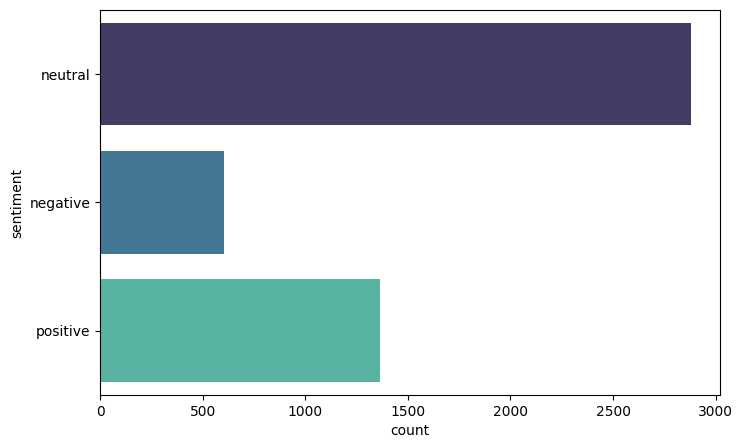

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(y="sentiment", data=df, palette="mako")

In [ ]:
print(df.iloc[0:5, :])

  sentiment  \
0   neutral   
1  negative   
2  positive   
3  positive   
4  positive   

                                                                                                                                                                                                                                   text  
0                                        Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .  
1  The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .  
2                        With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the pr

In [ ]:
# Define a function that integrates lowercasing, special character removal, and placeholder handling
def clean_and_preprocess_text(text):
    # Clean HTML tags
    text = BeautifulSoup(text, "lxml").text

    # Replace URLs with <URL>
    text = re.sub(r'http\S+', r'<URL>', text)

    # Convert to lowercase
    text = text.lower()

    # Replace percentages (e.g., "65 per cent") with just the number and "percentage"
    text = re.sub(r'(\d+)\s*percent|\s*per cent|\s*%', r'\1 percentage', text)
    text = re.sub(r'(\d+)\s*percentageage', r'\1 percentage', text, flags=re.IGNORECASE)

    # Handle placeholders by removing angle brackets
    text = re.sub(r'<([^>]+)>', r'\1', text)  # Convert <PERCENTAGE> to PERCENTAGE

    # Remove special characters except for letters, numbers, and spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Normalize spaces: replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the function to the 'Message' column
df['cleaned_text'] = df['text'].apply(clean_and_preprocess_text)



<ipython-input-7-d651f846587b>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text


In [ ]:
df

,sentiment,text,cleaned_text
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",technopolis plans to develop in stages an area of no less than 100000 square meters in order to host companies working in computer technologies and telecommunications the statement said
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers the daily postimees reported
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,with the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",according to the company s updated strategy for the years 20092012 basware targets a longterm net sales growth in the range of 20 percentage 40 percentage with an operating profit margin of 10 percentage 20 percentage of net sales
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .,financing of aspocomp s growth aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding hdi printed circuit boards pcbs
...,...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .,london marketwatch share prices ended lower in london monday as a rebound in bank stocks failed to offset broader weakness for the ftse 100
4841,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres .",rinkuskiai s beer sales fell by 65 percentage to 416 million litres while kauno alus beer sales jumped by 69 percentage to 248 million litres
4842,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .",operating profit fell to eur 354 mn from eur 688 mn in 2007 including vessel sales gain of eur 123 mn
4843,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn .",net sales of the paper segment decreased to eur 2216 mn in the second quarter of 2009 from eur 2411 mn in the second quarter of 2008 while operating profit excluding nonrecurring items rose to eur 80 mn from eur 76 mn


In [ ]:
'''
#Convert sting to numeric
sentiment  = {'positive': 0,'neutral': 1,'negative':2}

df.sentiment = [sentiment[item] for item in df.sentiment]
print(df)
'''

"\n#Convert sting to numeric\nsentiment  = {'positive': 0,'neutral': 1,'negative':2}\n\ndf.sentiment = [sentiment[item] for item in df.sentiment]\nprint(df)\n"

In [ ]:
df['cleaned_text'] = df['cleaned_text'].apply(nltk.word_tokenize)

In [ ]:
stop_words = set(stopwords.words('english'))
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: [word for word in x if word not in stop_words])
df

,sentiment,text,cleaned_text
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .","[technopolis, plans, develop, stages, area, less, 100000, square, meters, order, host, companies, working, computer, technologies, telecommunications, statement, said]"
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .","[international, electronic, industry, company, elcoteq, laid, tens, employees, tallinn, facility, contrary, earlier, layoffs, company, contracted, ranks, office, workers, daily, postimees, reported]"
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,"[new, production, plant, company, would, increase, capacity, meet, expected, increase, demand, would, improve, use, raw, materials, therefore, increase, production, profitability]"
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .","[according, company, updated, strategy, years, 20092012, basware, targets, longterm, net, sales, growth, range, 20, percentage, 40, percentage, operating, profit, margin, 10, percentage, 20, percentage, net, sales]"
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .,"[financing, aspocomp, growth, aspocomp, aggressively, pursuing, growth, strategy, increasingly, focusing, technologically, demanding, hdi, printed, circuit, boards, pcbs]"
...,...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .,"[london, marketwatch, share, prices, ended, lower, london, monday, rebound, bank, stocks, failed, offset, broader, weakness, ftse, 100]"
4841,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres .","[rinkuskiai, beer, sales, fell, 65, percentage, 416, million, litres, kauno, alus, beer, sales, jumped, 69, percentage, 248, million, litres]"
4842,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .","[operating, profit, fell, eur, 354, mn, eur, 688, mn, 2007, including, vessel, sales, gain, eur, 123, mn]"
4843,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn .","[net, sales, paper, segment, decreased, eur, 2216, mn, second, quarter, 2009, eur, 2411, mn, second, quarter, 2008, operating, profit, excluding, nonrecurring, items, rose, eur, 80, mn, eur, 76, mn]"


In [ ]:
'''from nltk import PorterStemmer
stemming = PorterStemmer()

df['cleaned_text'] = df['cleaned_text'].apply(lambda x: [stemming.stem(word) for word in x])'''

"from nltk import PorterStemmer\nstemming = PorterStemmer()\n\ndf['cleaned_text'] = df['cleaned_text'].apply(lambda x: [stemming.stem(word) for word in x])"

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['cleaned_text'] = df['cleaned_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x))
df

,sentiment,text,cleaned_text
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",technopolis plan develop stage area le 100000 square meter order host company working computer technology telecommunication statement said
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",international electronic industry company elcoteq laid ten employee tallinn facility contrary earlier layoff company contracted rank office worker daily postimees reported
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,new production plant company would increase capacity meet expected increase demand would improve use raw material therefore increase production profitability
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",according company updated strategy year 20092012 basware target longterm net sale growth range 20 percentage 40 percentage operating profit margin 10 percentage 20 percentage net sale
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .,financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit board pcbs
...,...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .,london marketwatch share price ended lower london monday rebound bank stock failed offset broader weakness ftse 100
4841,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres .",rinkuskiai beer sale fell 65 percentage 416 million litre kauno alus beer sale jumped 69 percentage 248 million litre
4842,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .",operating profit fell eur 354 mn eur 688 mn 2007 including vessel sale gain eur 123 mn
4843,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn .",net sale paper segment decreased eur 2216 mn second quarter 2009 eur 2411 mn second quarter 2008 operating profit excluding nonrecurring item rose eur 80 mn eur 76 mn


## **Data Visualization on Cleaning and Preprocessing**

<ipython-input-14-2d409bb73bae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y="sentiment", data=df, palette="mako")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 li

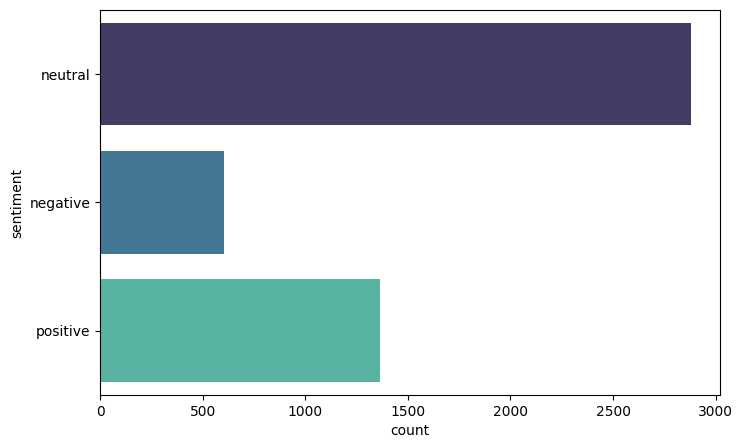

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(y="sentiment", data=df, palette="mako")

## **Applying Bag of Words, N-Grams** - **For comparision**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=100,binary=True)

In [ ]:
bog= cv.fit_transform(df['text']).toarray()

np.set_printoptions(edgeitems=30, linewidth=100000,
    formatter=dict(float=lambda u: "%.3g" % u))

In [ ]:
bog

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..., 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..., 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1

### **Creates a Large Sparse Matrix**
***

In [ ]:
cv.vocabulary_

{'to': 87,
 'in': 44,
 'an': 12,
 'of': 60,
 'than': 83,
 '000': 0,
 'companies': 23,
 'and': 13,
 'the': 85,
 'said': 75,
 'company': 24,
 'has': 40,
 'from': 38,
 'its': 49,
 'with': 98,
 'new': 57,
 'production': 70,
 'plant': 69,
 'increase': 45,
 'according': 9,
 'for': 37,
 '2009': 6,
 'net': 56,
 'sales': 76,
 'operating': 63,
 'profit': 72,
 '10': 1,
 'is': 47,
 'by': 21,
 'on': 61,
 'quarter': 73,
 '2010': 7,
 'period': 68,
 'year': 99,
 'it': 48,
 'loss': 50,
 'increased': 46,
 'eur': 31,
 'mn': 54,
 'rose': 74,
 'corresponding': 29,
 '2007': 4,
 'up': 90,
 'business': 20,
 'customers': 30,
 'first': 36,
 'value': 91,
 'shares': 80,
 'agreement': 10,
 'at': 16,
 'finland': 34,
 'was': 92,
 'oyj': 66,
 'this': 86,
 'per': 67,
 'finnish': 35,
 '2005': 2,
 'compared': 25,
 '2006': 3,
 'helsinki': 43,
 'nokia': 58,
 'contract': 27,
 'services': 78,
 'corporation': 28,
 '2008': 5,
 'will': 97,
 'share': 79,
 'have': 41,
 'construction': 26,
 'technology': 82,
 'been': 19,
 'that':

### **N-Grams**

In [ ]:
## Create the Bag OF Words model wiith ngram
from sklearn.feature_extraction.text import CountVectorizer
## for Binary BOW enable binary=True
cv=CountVectorizer(max_features=100,binary=True, ngram_range= (1,1))  # max_features dentoes top 100 frequent vocabulary , binary denotes binary Bag of Words , ngram_range is unigram
u= cv.fit_transform(df["text"]).toarray()

### **(1,1)- Unigram is completely same as above**
## **(2,2)- Bigram**

In [ ]:
## Create the Bag OF Words model wiith ngram
from sklearn.feature_extraction.text import CountVectorizer
## for Binary BOW enable binary=True
cv=CountVectorizer(max_features=100,binary=True, ngram_range= (2,2))  # max_features dentoes top 200 frequent vocabulary , binary denotes binary Bag of Words , ngram_range is unigram & Bigram
u= cv.fit_transform(df["text"]).toarray()

In [ ]:
cv.vocabulary_

{'the company': 75,
 'of its': 50,
 'with the': 98,
 'the new': 82,
 'according to': 0,
 'to the': 91,
 'for the': 15,
 'net sales': 43,
 'in the': 26,
 'operating profit': 54,
 'quarter of': 61,
 'of 2010': 48,
 'the same': 83,
 'same period': 69,
 'year earlier': 99,
 'loss of': 34,
 'the third': 85,
 'third quarter': 88,
 'to eur': 90,
 'profit rose': 60,
 'rose to': 62,
 'mn from': 38,
 'from eur': 16,
 'eur mn': 11,
 'mn in': 39,
 'the corresponding': 77,
 'corresponding period': 7,
 'period in': 58,
 'in 2007': 22,
 'totalled eur': 92,
 'up from': 93,
 'of the': 51,
 'at the': 3,
 'in 2005': 20,
 'compared to': 6,
 'in 2006': 21,
 'sales of': 68,
 'per share': 57,
 'from the': 17,
 'in 2009': 24,
 'by the': 4,
 'number of': 44,
 'said that': 65,
 'last year': 33,
 'net profit': 42,
 'on the': 53,
 'company said': 5,
 'value of': 94,
 'oyj hel': 55,
 'in 2008': 23,
 'stock exchange': 71,
 'part of': 56,
 'its net': 32,
 'mln euro': 36,
 'that it': 72,
 'the world': 87,
 'is the': 

In [ ]:
def get_top_n_bigram(corpus, n=None):
    cv = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df["text"], 20)
for word, freq in common_words:
    print(word, freq)
df3 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df3.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',title='Top 20 bigrams in review before removing stop words')

in the 804
of the 719
the company 502
for the 356
will be 272
net sales 246
to the 242
to eur 227
from eur 210
eur mn 196
operating profit 194
mn in 190
and the 182
on the 175
the first 159
quarter of 155
in finland 153
to be 153
of eur 144
at the 125


In [ ]:
def get_top_n_bigram(corpus, n=None):
    cv = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df["text"], 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df4.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words')

net sales 246
eur mn 196
operating profit 194
mn eur 127
corresponding period 108
mln euro 107
net profit 93
said today 86
oyj hel 85
company said 73
eur million 72
omx helsinki 63
profit eur 60
second quarter 57
euro mln 57
year earlier 56
mn corresponding 54
totalled eur 48
mln eur 48
net loss 47


## **(3,3) - Trigram**

In [ ]:
## Create the Bag OF Words model wiith ngram
from sklearn.feature_extraction.text import CountVectorizer
## for Binary BOW enable binary=True
cv=CountVectorizer(max_features=100,binary=True, ngram_range= (3,3))  # max_features dentoes top 200 frequent vocabulary , binary denotes binary Bag of Words , ngram_range is trigram
u= cv.fit_transform(df["text"]).toarray()

In [ ]:
cv.vocabulary_

{'according to the': 0,
 'an operating profit': 1,
 'quarter of 2010': 65,
 'for the same': 22,
 'the same period': 89,
 'in the third': 28,
 'the third quarter': 91,
 'third quarter of': 93,
 'net sales increased': 45,
 'operating profit rose': 54,
 'profit rose to': 61,
 'rose to eur': 66,
 'mn from eur': 38,
 'from eur mn': 23,
 'eur mn in': 15,
 'mn in the': 39,
 'in the corresponding': 25,
 'the corresponding period': 82,
 'corresponding period in': 10,
 'mn up from': 40,
 'up from eur': 97,
 'board of directors': 6,
 'the number of': 88,
 'to eur mn': 94,
 'year on year': 99,
 'operating profit for': 52,
 'profit for the': 59,
 'as compared to': 3,
 'compared to the': 9,
 'period in 2005': 58,
 'the company said': 80,
 'value of the': 98,
 'stock exchange release': 74,
 'sales for the': 70,
 'its net sales': 33,
 'net sales for': 43,
 'as well as': 4,
 'its net profit': 32,
 'of the company': 50,
 'that it has': 75,
 'in finland and': 24,
 'same period of': 72,
 'in the first': 2

In [ ]:
def get_top_n_trigram(corpus, n=None):
    cv = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df["text"], 20)
for word, freq in common_words:
    print(word, freq)
df5 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df5.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review before removing stop words')

mn in the 120
the corresponding period 108
corresponding period in 87
as well as 82
in the first 76
mn from eur 73
eur mn in 73
in the corresponding 73
the end of 68
net sales of 66
the first quarter 58
the company said 57
the third quarter 53
from eur mn 52
value of the 52
the second quarter 51
mln euro mln 51
the same period 49
in the second 46
first quarter of 44


In [ ]:
def get_top_n_trigram(corpus, n=None):
    cv = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df["text"], 20)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['text' ,'count'])
df6.groupby('text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review after removing stop words')

mn corresponding period 54
mln euro mln 51
eur mn eur 42
mn eur mn 41
net sales eur 30
profit eur mn 29
profit rose eur 27
earnings share eps 27
said today net 26
eur mn corresponding 25
eur mn compared 25
operating profit eur 24
corresponding period 2005 23
totalled eur mn 23
non recurring items 22
operating profit rose 21
corresponding period 2009 21
stock exchange release 21
net sales increased 20
month period increased 19


## **Comparision Text**
### **1. Count Vectorization**
Similar to BoW, but simply counts occurrences of words without applying weighting like TF-IDF.
### **2. Bag of Words (BoW)**
A simple and commonly used method where text is represented as a frequency vector of words. It ignores context and word order, which can limit accuracy.
### **3. N-grams**
Similar to BoW and TF-IDF but considers sequences of n words (bigrams, trigrams, etc.). This can capture some context but can lead to sparsity issues with larger n.
### **4. TF-IDF (Term Frequency-Inverse Document Frequency)**
A refinement of BoW that weighs the frequency of words by their importance in the document corpus. While better than BoW, it still lacks contextual understanding.



In [ ]:
from textblob import TextBlob

df['polarity'] = df['cleaned_text'].map(lambda text: TextBlob(text).sentiment.polarity)
df['text_len'] = df['cleaned_text'].astype(str).apply(len)
df['word_count'] = df['cleaned_text'].apply(lambda x: len(str(x).split()))
df

,sentiment,text,cleaned_text,polarity,text_len,word_count
0,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .",technopolis plan develop stage area le 100000 square meter order host company working computer technology telecommunication statement said,0.000000,138,18
1,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .",international electronic industry company elcoteq laid ten employee tallinn facility contrary earlier layoff company contracted rank office worker daily postimees reported,-0.160000,171,21
2,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .,new production plant company would increase capacity meet expected increase demand would improve use raw material therefore increase production profitability,-0.064802,157,20
3,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .",according company updated strategy year 20092012 basware target longterm net sale growth range 20 percentage 40 percentage operating profit margin 10 percentage 20 percentage net sale,0.000000,183,26
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .,financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit board pcbs,0.000000,151,17
...,...,...,...,...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .,london marketwatch share price ended lower london monday rebound bank stock failed offset broader weakness ftse 100,-0.500000,115,17
4841,neutral,"Rinkuskiai 's beer sales fell by 6.5 per cent to 4.16 million litres , while Kauno Alus ' beer sales jumped by 6.9 per cent to 2.48 million litres .",rinkuskiai beer sale fell 65 percentage 416 million litre kauno alus beer sale jumped 69 percentage 248 million litre,0.000000,117,19
4842,negative,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .",operating profit fell eur 354 mn eur 688 mn 2007 including vessel sale gain eur 123 mn,0.000000,86,17
4843,negative,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose to EUR 8.0 mn from EUR 7.6 mn .",net sale paper segment decreased eur 2216 mn second quarter 2009 eur 2411 mn second quarter 2008 operating profit excluding nonrecurring item rose eur 80 mn eur 76 mn,0.040000,166,29


In [ ]:
df['cleaned_text']

,cleaned_text
0,technopolis plan develop stage area le 100000 square meter order host company working computer technology telecommunication statement said
1,international electronic industry company elcoteq laid ten employee tallinn facility contrary earlier layoff company contracted rank office worker daily postimees reported
2,new production plant company would increase capacity meet expected increase demand would improve use raw material therefore increase production profitability
3,according company updated strategy year 20092012 basware target longterm net sale growth range 20 percentage 40 percentage operating profit margin 10 percentage 20 percentage net sale
4,financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit board pcbs
...,...
4840,london marketwatch share price ended lower london monday rebound bank stock failed offset broader weakness ftse 100
4841,rinkuskiai beer sale fell 65 percentage 416 million litre kauno alus beer sale jumped 69 percentage 248 million litre
4842,operating profit fell eur 354 mn eur 688 mn 2007 including vessel sale gain eur 123 mn
4843,net sale paper segment decreased eur 2216 mn second quarter 2009 eur 2411 mn second quarter 2008 operating profit excluding nonrecurring item rose eur 80 mn eur 76 mn


In [ ]:
X = df['cleaned_text']

In [ ]:
'''
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['sentiment'])
'''

"\nfrom sklearn.preprocessing import LabelEncoder\n\n# Encode target labels\nle = LabelEncoder()\nY = le.fit_transform(df['sentiment'])\n"

In [ ]:
X[0]

'technopolis plan develop stage area le 100000 square meter order host company working computer technology telecommunication statement said'

In [ ]:
total_word_count = df['word_count'].sum()
total_word_count

64354

In [ ]:
max_sequence_len = max([len(x) for x in df['cleaned_text']])
max_sequence_len


267

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


max_words = 64354
max_len= 267

def tokenize_pad_sequences(text):

    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='pre', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['text'][0])
X, tokenizer = tokenize_pad_sequences(df['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .
After Tokenization & Padding 
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 

In [ ]:
y = pd.get_dummies(df['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set ->', X_train.shape, y_train.shape)
print('Validation Set ->', X_val.shape, y_val.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (2907, 267) (2907, 3)
Validation Set -> (969, 267) (969, 3)
Test Set -> (969, 267) (969, 3)


In [ ]:
# Train our LSTM RNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau  # Import ReduceLROnPlateau


# Add an input layer explicitly to define the input shape clearly
model = Sequential()

# Explicitly define the input shape using an Input layer
model.add(Input(shape=(max_sequence_len - 1,)))

# Add the Embedding layer
model.add(Embedding(total_word_count, 100, input_length=max_sequence_len - 1))

# Add LSTM layers
model.add(LSTM(120, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(LSTM(80 ,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))

# Add the Dense output layer
model.add(Dense(3, activation="softmax"))

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


# Check the summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 266, 100)            │       6,435,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 266, 120)            │         106,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 266, 120)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 80)                  │          64,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │             243 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,606,043 (25.20 MB)

 Trainable params: 6,606,043 (25.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model

history = model.fit(X_train, y_train, epochs =20, validation_data = (X_test,y_test), verbose = 1)    ### increase the epochs to increase the model accuracy
## also include early loss stopp use gpt and include if needed

Epoch 1/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 96s 736ms/step - accuracy: 0.5966 - loss: 2.6923 - val_accuracy: 0.6450 - val_loss: 0.9080
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 149s 797ms/step - accuracy: 0.7119 - loss: 0.7399 - val_accuracy: 0.6698 - val_loss: 0.8026
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 127s 674ms/step - accuracy: 0.7899 - loss: 0.5494 - val_accuracy: 0.6440 - val_loss: 0.8575
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 141s 670ms/step - accuracy: 0.8249 - loss: 0.4492 - val_accuracy: 0.6852 - val_loss: 0.8707
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 82s 674ms/step - accuracy: 0.8660 - loss: 0.3996 - val_accuracy: 0.6656 - val_loss: 1.0180
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 144s 688ms/step - accuracy: 0.8895 - loss: 0.3540 - val_accuracy: 0.6873 - val_loss: 0.9950
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 83s 675ms/step - accuracy: 0.9189 - loss: 0.2805 - val_accuracy: 0.6677 - val_loss: 1.0301
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 142s 678ms/step - accuracy: 0.9423 - lo

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assume you have your tokenizer saved or available for use
# Example: tokenizer = load_your_tokenizer() # Load your tokenizer if saved

# New sentence to predict sentiment for
new_sentence = "I am very happy with the service!"

# Step 1: Preprocess the new sentence
# Tokenize the new sentence
tokenized_sentence = tokenizer.texts_to_sequences([new_sentence])

# Pad the sequence to the same length as the input shape of the model
max_sequence_len = 100  # Update this if your max sequence length is different
padded_sentence = pad_sequences(tokenized_sentence, maxlen=max_sequence_len - 1)

# Step 2: Make a prediction
predictions = model.predict(padded_sentence)

# Step 3: Interpret the output
# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Define your sentiment labels
sentiment_labels = ['negative', 'neutral', 'positive']  # Adjust these based on your training

# Get the predicted sentiment
predicted_sentiment = sentiment_labels[predicted_class_index]

print(f"Predicted Sentiment: {predicted_sentiment}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Predicted Sentiment: positive


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

vocab_size = 5000
embedding_size = 32
epochs=20
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(learning_rate=0.1, momentum=0.8, decay=decay_rate, nesterov=False)

# Build model
model5= Sequential()
model5.add(Embedding(vocab_size, embedding_size))
model5.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model5.add(MaxPooling1D(pool_size=1))
model5.add(Bidirectional(LSTM(32)))
model5.add(Dropout(0.4))
model5.add(Dense(3, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning:

Argument `decay` is no longer supported and will be ignored.



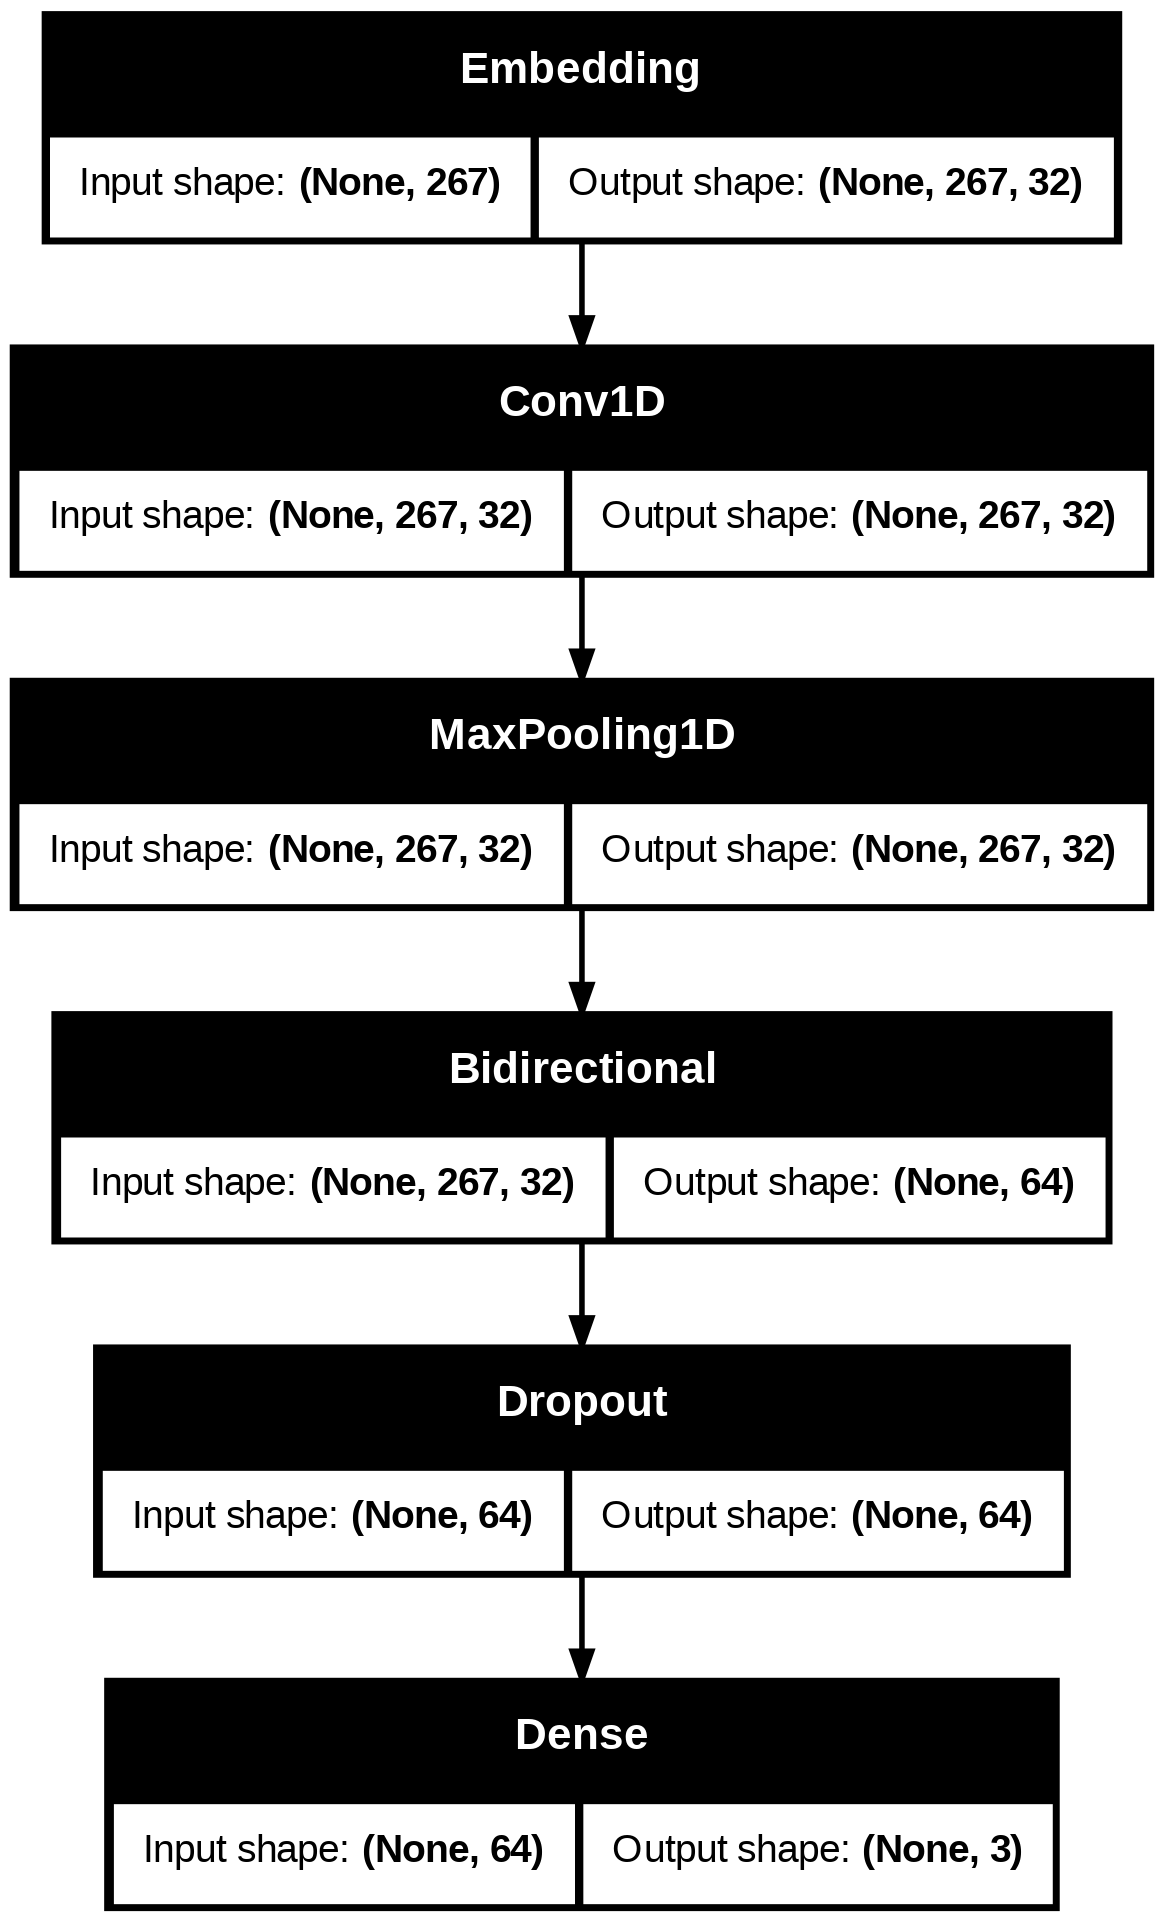

In [ ]:
import tensorflow as tf
model.build(input_shape=(None, max_len))
tf.keras.utils.plot_model(model, show_shapes=True)


In [ ]:
print(model5.summary())

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd,
               metrics=['accuracy', Precision(), Recall()])

# Train model

batch_size = 32
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=batch_size, epochs=epochs, verbose=1)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node sequential_1_1/embedding_1_1/GatherV2 defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-57-eb8f705c5169>", line 10, in <cell line: 10>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 51, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 209, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 175, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 556, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 882, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py", line 140, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/numpy.py", line 4875, in take

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/numpy.py", line 1951, in take

indices[28,252] = 7426 is not in [0, 5000)
	 [[{{node sequential_1_1/embedding_1_1/GatherV2}}]] [Op:__inference_one_step_on_iterator_57235]

In [ ]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.6409
Precision : 0.6504
Recall    : 0.6336
F1 Score  : 0.6419


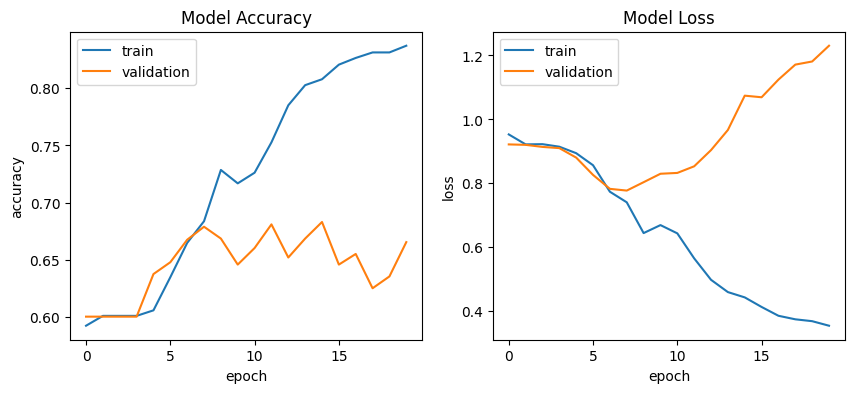

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

plot_training_hist(history)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


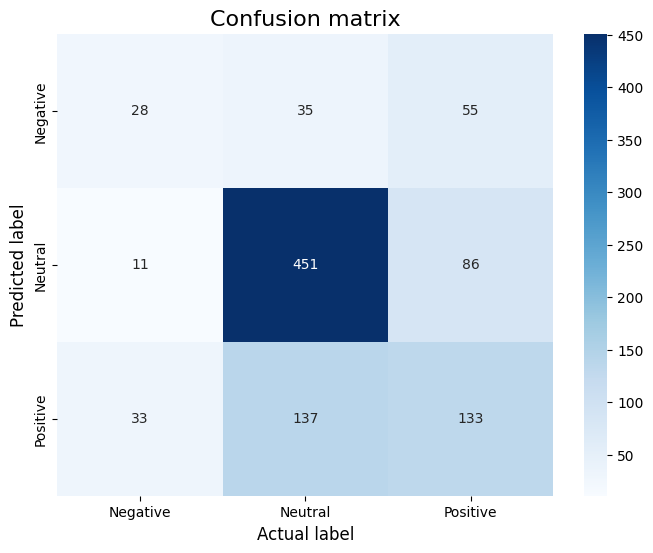

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)